
📊 Original quote data: 38,333 quotes from 25,930 customers

STRATEGY: CREATE MEANINGFUL SEQUENCE FEATURES
Creating enhanced customer features...
  Total customers: 25,930
✓ Created features for 25,930 customers
✓ New features: ['numero_compte', 'total_quotes', 'converted', 'avg_days_between_quotes', 'std_days_between_quotes', 'max_days_between_quotes', 'engagement_density', 'price_trajectory', 'unique_product_families', 'product_consistency']...
Creating sequence features (this may take a moment)...
  Total customers: 25,930
✓ Created features for 25,930 customers
✓ New features: ['numero_compte', 'total_quotes', 'converted', 'avg_days_since_first_quote', 'std_days_since_first_quote', 'max_days_since_first_quote', 'avg_recent_quote_count', 'std_recent_quote_count', 'avg_recent_avg_price', 'std_recent_avg_price']...
Index(['numero_compte', 'total_quotes', 'converted',
       'avg_days_since_first_quote', 'std_days_since_first_quote',
       'max_days_since_first_quote', 'avg_recent_quo

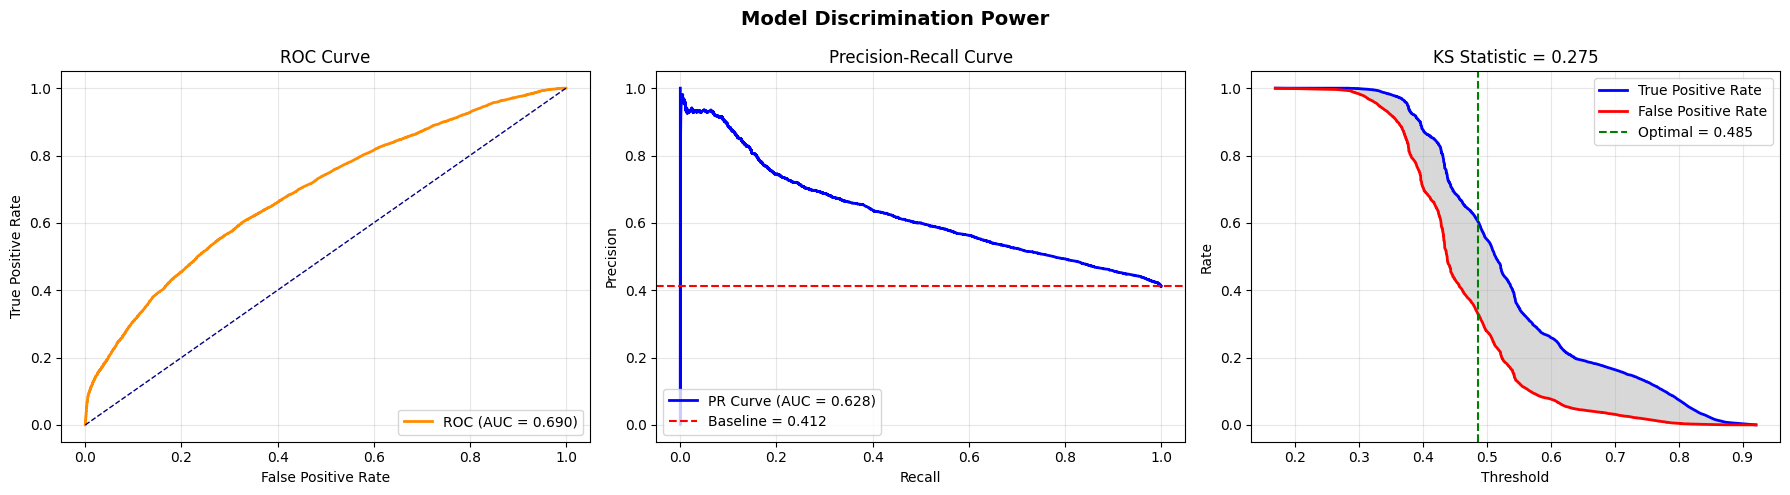

• ROC-AUC: 0.6896
• PR-AUC: 0.6276
• KS Statistic: 0.275 (WEAK discrimination)
• Optimal Threshold: 0.485

💼 STEP 2: BUSINESS IMPACT
----------------------------------------
Verification of decile assignment:
Decile 1 mean prob: 0.771
Decile 10 mean prob: 0.339


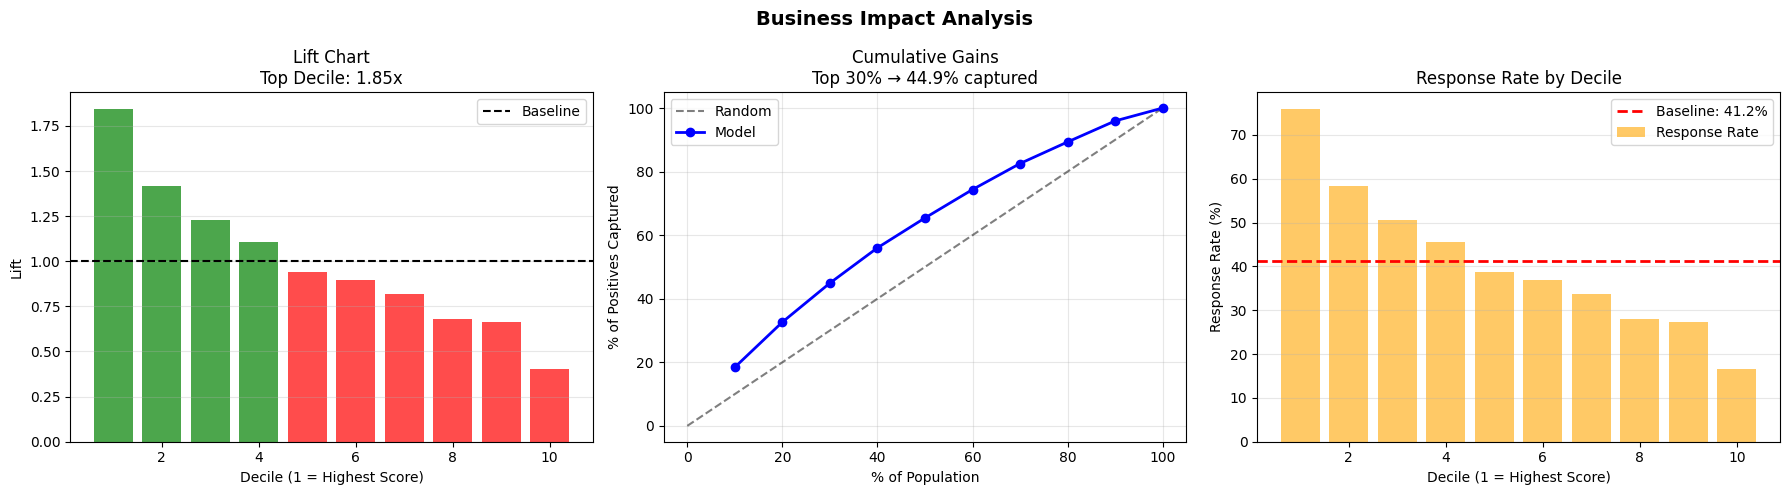

• Top Decile Lift: 0.41x
• Top 30% captures: 44.9% of positives
• Baseline response rate: 41.2%
• Top decile response: 76.0%

📈 STEP 4: CONFUSION MATRIX
----------------------------------------


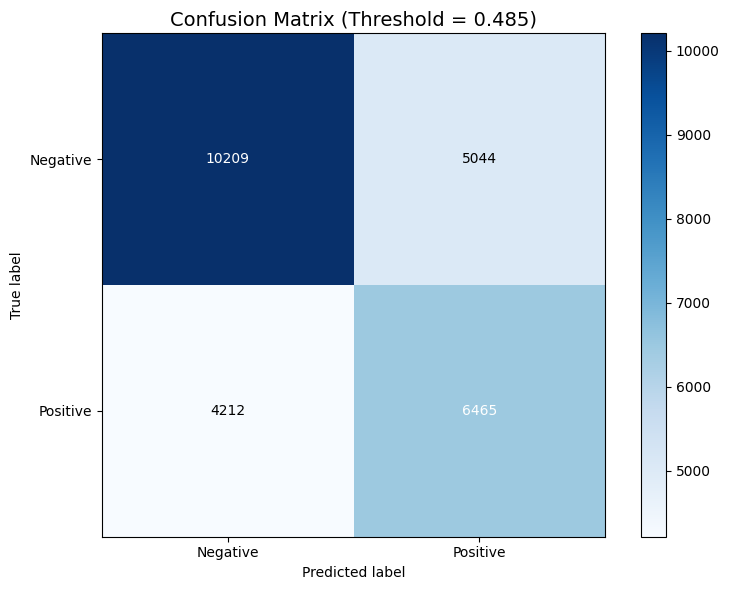

At threshold 0.485:
• Accuracy: 0.643
• Precision: 0.562
• Recall: 0.606
• F1-Score: 0.583
• True Positives: 6465
• False Positives: 5044
• True Negatives: 10209
• False Negatives: 4212

FINAL VALIDATION SUMMARY

✅ DISCRIMINATION POWER:
   KS Statistic: 0.275 (WEAK discrimination)

✅ BUSINESS VALUE:
   Efficiency: 0.41x better than random
   Coverage: Top 30% → 44.9% captured

✅ MODEL QUALITY:
   ROC-AUC: 0.6896 (Excellent if >0.8)
   PR-AUC: 0.6276 (Excellent if >0.7)

✅ OPERATIONAL METRICS:
   Optimal Threshold: 0.485
   Precision at threshold: 0.562
   Recall at threshold: 0.606

🧪 TEST 2: SEQUENCE FEATURES (Advanced)
✓ Model saved: sequence_prediction_model.pkl
✓ AUC: 0.734
COMPLETE MODEL VALIDATION PACKAGE

📊 STEP 1: DISCRIMINATION POWER
----------------------------------------


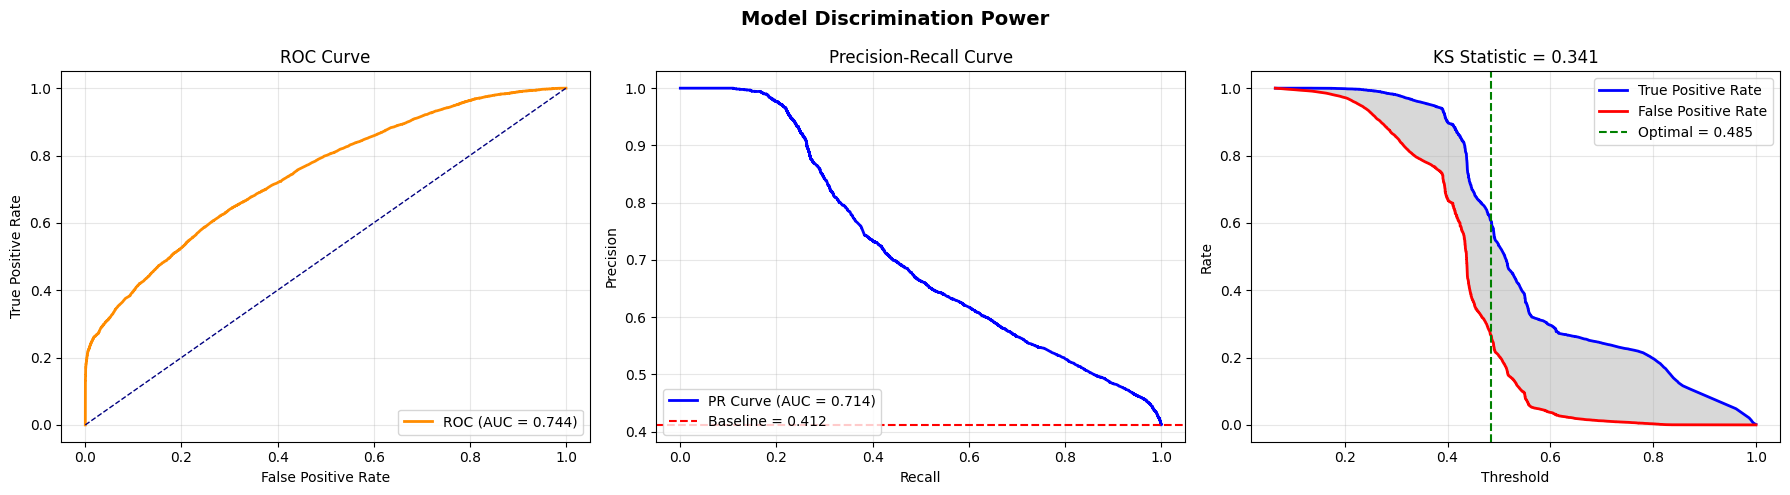

• ROC-AUC: 0.7439
• PR-AUC: 0.7136
• KS Statistic: 0.341 (MODERATE discrimination)
• Optimal Threshold: 0.485

💼 STEP 2: BUSINESS IMPACT
----------------------------------------
Verification of decile assignment:
Decile 1 mean prob: 0.874
Decile 10 mean prob: 0.243


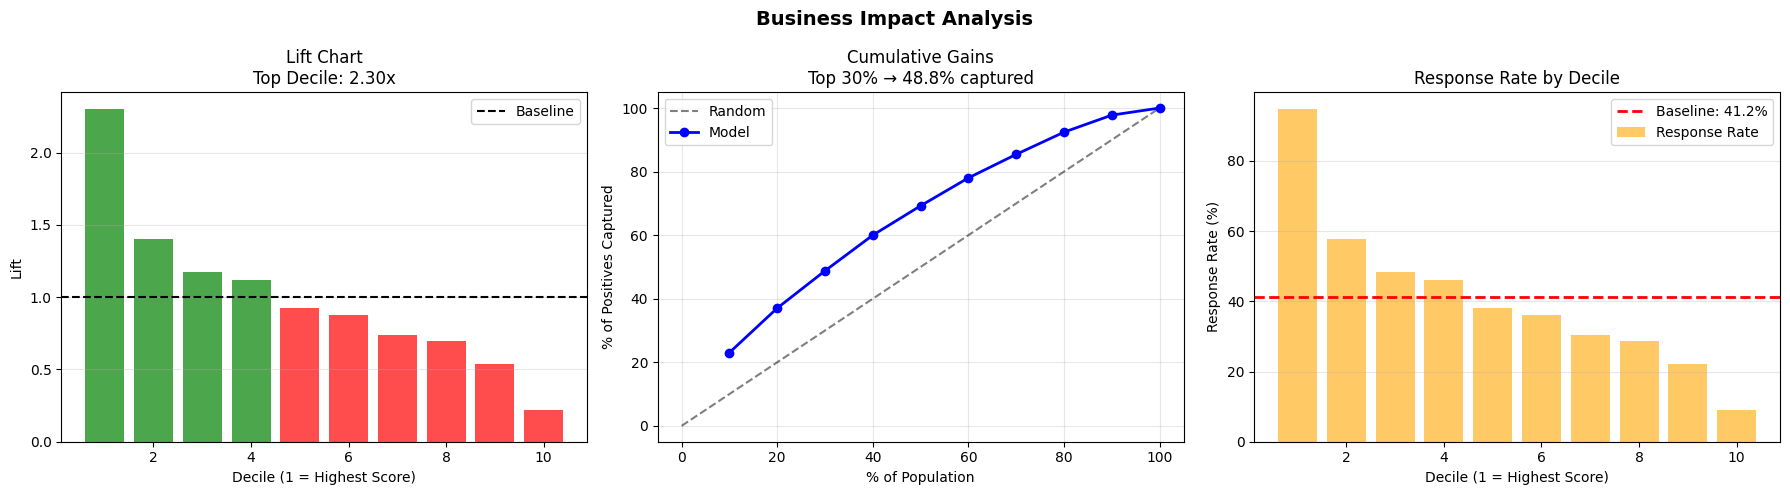

• Top Decile Lift: 0.22x
• Top 30% captures: 48.8% of positives
• Baseline response rate: 41.2%
• Top decile response: 94.9%

📈 STEP 4: CONFUSION MATRIX
----------------------------------------


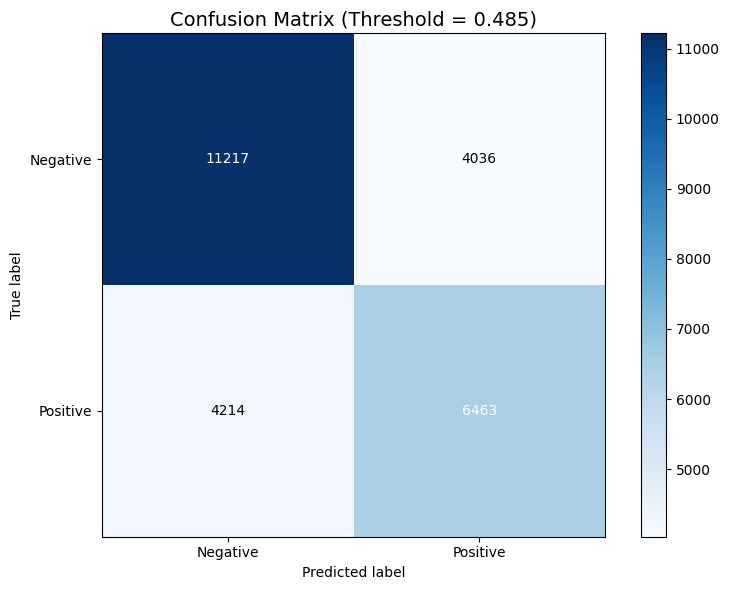

At threshold 0.485:
• Accuracy: 0.682
• Precision: 0.616
• Recall: 0.605
• F1-Score: 0.610
• True Positives: 6463
• False Positives: 4036
• True Negatives: 11217
• False Negatives: 4214

FINAL VALIDATION SUMMARY

✅ DISCRIMINATION POWER:
   KS Statistic: 0.341 (MODERATE discrimination)

✅ BUSINESS VALUE:
   Efficiency: 0.22x better than random
   Coverage: Top 30% → 48.8% captured

✅ MODEL QUALITY:
   ROC-AUC: 0.7439 (Excellent if >0.8)
   PR-AUC: 0.7136 (Excellent if >0.7)

✅ OPERATIONAL METRICS:
   Optimal Threshold: 0.485
   Precision at threshold: 0.616
   Recall at threshold: 0.605


{'y_true': array([1., 0., 0., ..., 0., 0., 0.], shape=(25930,)),
 'y_pred_proba': array([0.54117393, 0.50528251, 0.39541236, ..., 0.49921283, 0.51809423,
        0.38619388], shape=(25930,)),
 'y_pred': array([1, 1, 0, ..., 1, 1, 0], shape=(25930,)),
 'roc_auc': 0.7438565725321948,
 'pr_auc': 0.7136101223560198,
 'ks_statistic': np.float64(0.3407161618777234),
 'optimal_threshold': np.float64(0.48487649631712215),
 'top_decile_lift': np.float64(0.22290905685117543),
 'decile_stats':    decile  count  positives  mean_prob  response_rate      lift  \
 0       1   2593     2460.0   0.873637       0.948708  2.304018   
 1       2   2593     1495.0   0.602230       0.576552  1.400206   
 2       3   2593     1254.0   0.532932       0.483610  1.174487   
 3       4   2593     1197.0   0.497731       0.461627  1.121101   
 4       5   2593      987.0   0.469536       0.380640  0.924417   
 5       6   2593      937.0   0.441914       0.361358  0.877587   
 6       7   2593      791.0   0.4336

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

from etl.util import prepare_dataset_without_leakage
from ml_features.features import prepare_features
from ml_features.customer_features import create_customer_features
from ml_features.sequence_features  import create_sequence_features
from ml_training.train_rf import train_rf
from ml_evaluation.dashboard import model_evaluation_report

import warnings
warnings.filterwarnings('ignore')

# Load original clean quote data
df_quotes = pd.read_csv('cleaned_quote_data.csv')
df_quotes['dt_creation_devis'] = pd.to_datetime(df_quotes['dt_creation_devis'])

print(f"\n📊 Original quote data: {len(df_quotes):,} quotes from {df_quotes['numero_compte'].nunique():,} customers")


print("\n" + "="*80)
print("STRATEGY: CREATE MEANINGFUL SEQUENCE FEATURES")
print("="*80)

# 1. Enhanced customer features
customer_df = create_customer_features(df_quotes)
len(customer_df)

# 2. Sequence features (for multi-quote customers)
sequence_df = create_sequence_features(df_quotes)
print(sequence_df.columns)

sequence_df = pd.merge(
    sequence_df, 
    customer_df, 
    on='numero_compte', 
    how='left',
    suffixes=('_seq', '')  # Explicit suffixes
)

print("Columns:", sequence_df.columns.tolist())

# Now it's clear which column is which
y_sequence = sequence_df['converted']  # From sequence features
y_customer = sequence_df['converted']  # From customer features

# For modeling, use the sequence version
X_customer = customer_df.drop(columns=['numero_compte', 'converted'], errors='ignore')
X_customer_clean, y_customer_clean = prepare_features(X_customer, y_customer, "Customer Features")

columns_to_drop =  [x for x in sequence_df.columns if '_seq' in x]
columns_to_drop.extend(['numero_compte', 'converted'])
X_sequence = sequence_df.drop(columns=columns_to_drop, errors='ignore')

X_sequence_clean, y_sequence_clean = prepare_features(X_sequence, y_sequence, "Sequence Features")


print("\n" + "="*80)
print("TESTING FEATURE IMPROVEMENT")
print("="*80)

# Test 1: Customer features only (baseline)
print("\n🧪 TEST 1: ENHANCED CUSTOMER FEATURES (Baseline)")
result = train_rf(X_customer_clean, y_customer_clean, 'improved_customer_model')
df = X_customer_clean.copy()
df['converted'] = y_customer_clean
model_evaluation_report(df, result['model'], result['features'], 'converted')

# Test 2: Sequence features (if available)
print("\n🧪 TEST 2: SEQUENCE FEATURES (Advanced)")
result = train_rf(X_sequence_clean, y_sequence_clean, 'sequence_prediction_model')
df = X_sequence_clean.copy()
df['converted'] = y_sequence_clean
model_evaluation_report(df, result['model'], result['features'], 'converted')

In [2]:
X_sequence_clean.columns

Index(['avg_days_since_first_quote', 'std_days_since_first_quote',
       'max_days_since_first_quote', 'avg_recent_quote_count',
       'std_recent_quote_count', 'avg_recent_avg_price',
       'std_recent_avg_price', 'avg_recent_price_std', 'std_recent_price_std',
       'avg_recent_product_variety', 'std_recent_product_variety',
       'avg_recent_conversion_rate', 'std_recent_conversion_rate',
       'avg_current_price', 'std_current_price', 'sequence_quote_ratio',
       'price_trend', 'conversion_rate_trend', 'total_quotes',
       'avg_days_between_quotes', 'std_days_between_quotes',
       'max_days_between_quotes', 'engagement_density', 'price_trajectory',
       'unique_product_families', 'product_consistency', 'avg_price',
       'price_range', 'price_volatility', 'main_agency', 'main_region',
       'avg_discount_pct'],
      dtype='object')